In [1]:
# Import of necessary packages
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestNeighbors
from random import randint
import seaborn as sns

In [2]:
# %% Variables & Switches 
do_preprocessing = 1

In [3]:
# %% Functions
# This function is used to calculate a result table including the relative and absolute deviation between two values
def create_resultstable(y_pred, y_test):
    results = pd.DataFrame([y_pred, y_test], index = ['y_predicted','y_test']).T
    results['deviations'] = results['y_predicted'] - results['y_test']
    results['rel_deviation'] = results['deviations']/results['y_test']
    results['abs_rel_deviation'] = abs(results['deviations']/results['y_test'])
    return results

In [4]:
# This function analyzes the deviation result table in cases of quantity splits
def table_deviation_per_quantity(results_table):
    dev_1 = results_table[results_table['y_test']<50]['abs_rel_deviation']
    dev_2 = results_table[(results_table['y_test']>50) & (results_table['y_test']<100)]['abs_rel_deviation']
    dev_3 = results_table[(results_table['y_test']>100) & (results_table['y_test']<150)]['abs_rel_deviation']
    dev_4 = results_table[(results_table['y_test']>150) & (results_table['y_test']<200)]['abs_rel_deviation']
    dev_5 = results_table[(results_table['y_test']>200)]['abs_rel_deviation']
    dev_quantity = pd.DataFrame([dev_1.describe(), dev_2.describe(), dev_3.describe(), dev_4.describe(), dev_5.describe()],
            index = ['0-50','50-100','100-150','150-200','>200']).T
    return dev_quantity

In [5]:
# This function plots the relative deviations
def plot_relative_deviation(results, ylimit):
    plt.figure(figsize = (12,8))
    plt.scatter(x = results['y_test'].values, y = results['rel_deviation'].values*100, s = 8)
    plt.xlabel('Q [mm^3]')
    plt.ylabel('Rel. error [%]')
    plt.plot([0,250], [3.6, 3.6], 'k-')
    plt.plot([0,250], [-3.6, -3.6], 'k-')
    axes = plt.gca()
    axes.set_ylim([-ylimit,ylimit])
    plt.show()

In [6]:
# Model training incl. plotting the result deviation
def percentage_split_eval(regression_model, X_train, y_train, ylimit):
    regression_model.fit(X_train, y_train)
    y_predicted = regression_model.predict(X_train)
    results = create_resultstable(y_predicted, y_train)
    print("Mean absolute error on training set", 
          mean_absolute_error(regression_model.predict(X_train), y_train))
    print("")
    results_per_quantity = table_deviation_per_quantity(results)
    display(results_per_quantity)
    plot_relative_deviation(results, ylimit)
    return(results_per_quantity)

In [7]:
# Tsting of model incl. plotting the result deviation
def percentage_split_test(regression_model, X_test, y_test, ylimit):
    y_predicted = regression_model.predict(X_test)
    results = create_resultstable(y_predicted, y_test)
    print("Mean absolute error on test set",mean_absolute_error(y_pred=y_predicted, y_true=y_test))
    results_per_quantity = table_deviation_per_quantity(results)
    display(results_per_quantity)
    plot_relative_deviation(results, ylimit)
    return(results_per_quantity)

In [8]:
# %% Load Data
#Training Data
dataTrain = pd.read_csv('../data/Trainingdata_p4m.csv',';')
# Test Data
dataTest = pd.read_csv('../data/Testdata_p4m.csv',';')

In [10]:
# %% Data Preprocessing
if do_preprocessing==1:
    # Correct by maximum pressure
    for k in dataTrain.index:
        dataTrain.loc[k,"p_transient_1 [bar]":"p_transient_20 [bar]"]=dataTrain.loc[k,"p_transient_1 [bar]":"p_transient_20 [bar]"].values-dataTrain.loc[k,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()
    for l in dataTest.index:
        dataTest.loc[l,"p_transient_1 [bar]":"p_transient_20 [bar]"]=dataTest.loc[l,"p_transient_1 [bar]":"p_transient_20 [bar]"].values-dataTest.loc[l,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()

In [11]:
dataTrain.corr()

,Q_Inj [mm3],nEng [rpm],p_transient_1 [bar],p_transient_2 [bar],p_transient_3 [bar],p_transient_4 [bar],p_transient_5 [bar],p_transient_6 [bar],p_transient_7 [bar],p_transient_8 [bar],...,p_transient_12 [bar],p_transient_13 [bar],p_transient_14 [bar],p_transient_15 [bar],p_transient_16 [bar],p_transient_17 [bar],p_transient_18 [bar],p_transient_19 [bar],p_transient_20 [bar],phiMI [GradCrA]
Q_Inj [mm3],1.000000,-0.014421,-0.960216,-0.964476,-0.963915,-0.963649,-0.964368,-0.954226,-0.858219,-0.625031,...,-0.387571,-0.683797,-0.883044,-0.950615,-0.968149,-0.956354,-0.948497,-0.945579,-0.951938,0.002289
nEng [rpm],-0.014421,1.000000,-0.037032,0.020842,0.004318,0.010287,0.029938,-0.031877,-0.210344,-0.537023,...,0.680234,0.496518,0.273063,0.144719,0.042617,-0.047779,-0.108636,-0.142051,-0.091674,-0.000514
p_transient_1 [bar],-0.960216,-0.037032,1.000000,0.990673,0.992474,0.994610,0.991855,0.984866,0.911041,0.705637,...,0.368950,0.681491,0.890589,0.958467,0.979371,0.978072,0.982614,0.981253,0.987087,0.070278
p_transient_2 [bar],-0.964476,0.020842,0.990673,1.000000,0.993754,0.995015,0.996818,0.987920,0.906805,0.681964,...,0.406598,0.708512,0.904448,0.968351,0.984858,0.980525,0.977573,0.979731,0.985452,0.066777
p_transient_3 [bar],-0.963915,0.004318,0.992474,0.993754,1.000000,0.993727,0.995710,0.989863,0.908615,0.689342,...,0.398485,0.708135,0.903259,0.966246,0.984663,0.980148,0.978826,0.978660,0.989983,0.065783
p_transient_4 [bar],-0.963649,0.010287,0.994610,0.995015,0.993727,1.000000,0.994296,0.987096,0.905653,0.680120,...,0.406026,0.709867,0.907664,0.966546,0.982550,0.977701,0.976664,0.973884,0.986235,0.068024
p_transient_5 [bar],-0.964368,0.029938,0.991855,0.996818,0.995710,0.994296,1.000000,0.986465,0.902177,0.676600,...,0.415446,0.717853,0.909958,0.971462,0.984803,0.977686,0.975548,0.975400,0.982312,0.065701
p_transient_6 [bar],-0.954226,-0.031877,0.984866,0.987920,0.989863,0.987096,0.986465,1.000000,0.940290,0.741357,...,0.349136,0.663949,0.875624,0.949338,0.980259,0.984464,0.983938,0.981988,0.984967,0.071056
p_transient_7 [bar],-0.858219,-0.210344,0.911041,0.906805,0.908615,0.905653,0.902177,0.940290,1.000000,0.868995,...,0.161061,0.492303,0.740857,0.836845,0.894901,0.944210,0.942929,0.944568,0.929378,0.107382
p_transient_8 [bar],-0.625031,-0.537023,0.705637,0.681964,0.689342,0.680120,0.676600,0.741357,0.868995,1.000000,...,-0.222613,0.127470,0.429961,0.569258,0.661185,0.738418,0.781111,0.773860,0.745985,0.180719


In [10]:
# Advanced: Factor x1000 faster via : operator in dataframes. No loop needed => vectorization.
"""
# %% Data Preprocessing
if do_preprocessing==1:
    # Correct by maximum pressure
    dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"] = dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values - dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()
    dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"] = dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values - dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()
"""

'\n# %% Data Preprocessing\nif do_preprocessing==1:\n    # Correct by maximum pressure\n    dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"] = dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values - dataTrain.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()\n    dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"] = dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values - dataTest.loc[:,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max()\n'

Index(['Q_Inj [mm3]', 'nEng [rpm]', 'p_transient_1 [bar]',
       'p_transient_2 [bar]', 'p_transient_3 [bar]', 'p_transient_4 [bar]',
       'p_transient_5 [bar]', 'p_transient_6 [bar]', 'p_transient_7 [bar]',
       'p_transient_8 [bar]', 'p_transient_9 [bar]', 'p_transient_10 [bar]',
       'p_transient_11 [bar]', 'p_transient_12 [bar]', 'p_transient_13 [bar]',
       'p_transient_14 [bar]', 'p_transient_15 [bar]', 'p_transient_16 [bar]',
       'p_transient_17 [bar]', 'p_transient_18 [bar]', 'p_transient_19 [bar]',
       'p_transient_20 [bar]', 'phiMI [GradCrA]'],
      dtype='object')
       Q_Inj [mm3]   nEng [rpm]  p_transient_1 [bar]  p_transient_2 [bar]  \
count  9992.000000  9992.000000          9992.000000          9992.000000   
mean    114.362045  1333.086227           -15.300591           -14.812952   
std      60.797061   385.066917             7.933813             7.987252   
min      13.799000   666.520000           -35.000000           -34.600000   
25%      60.32575

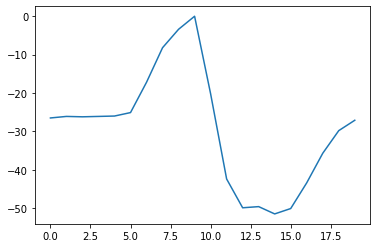

Q: 169.97
Max: 0.0 Min: -51.5 Diff: 51.5
Max_ber: 0.0 Min_ber: -51.5


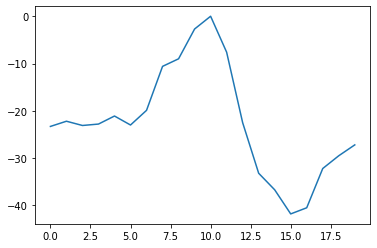

Q: 174.42
Max: 0.0 Min: -41.799999999999955 Diff: 41.799999999999955
Max_ber: 0.0 Min_ber: -41.799999999999955
[[ 1.         -0.96436821]
 [-0.96436821  1.        ]]


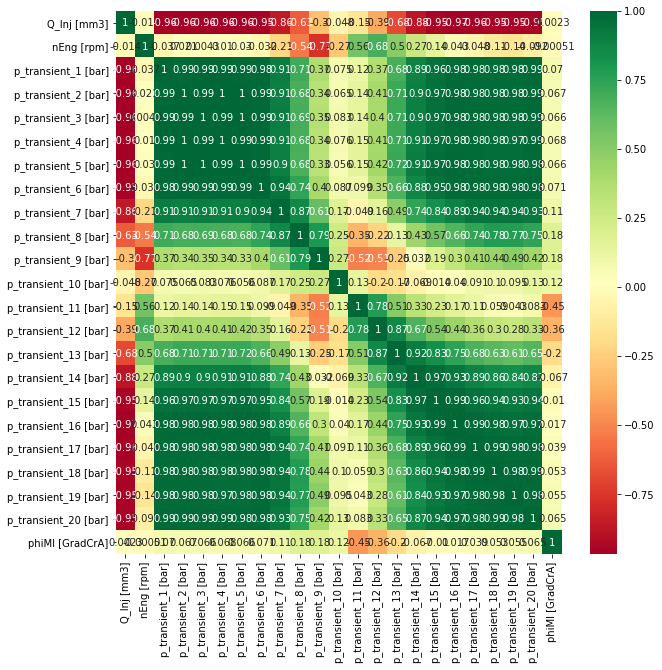

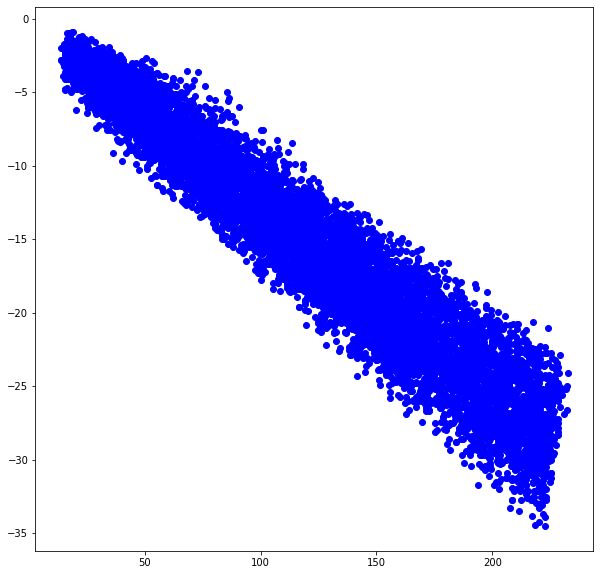

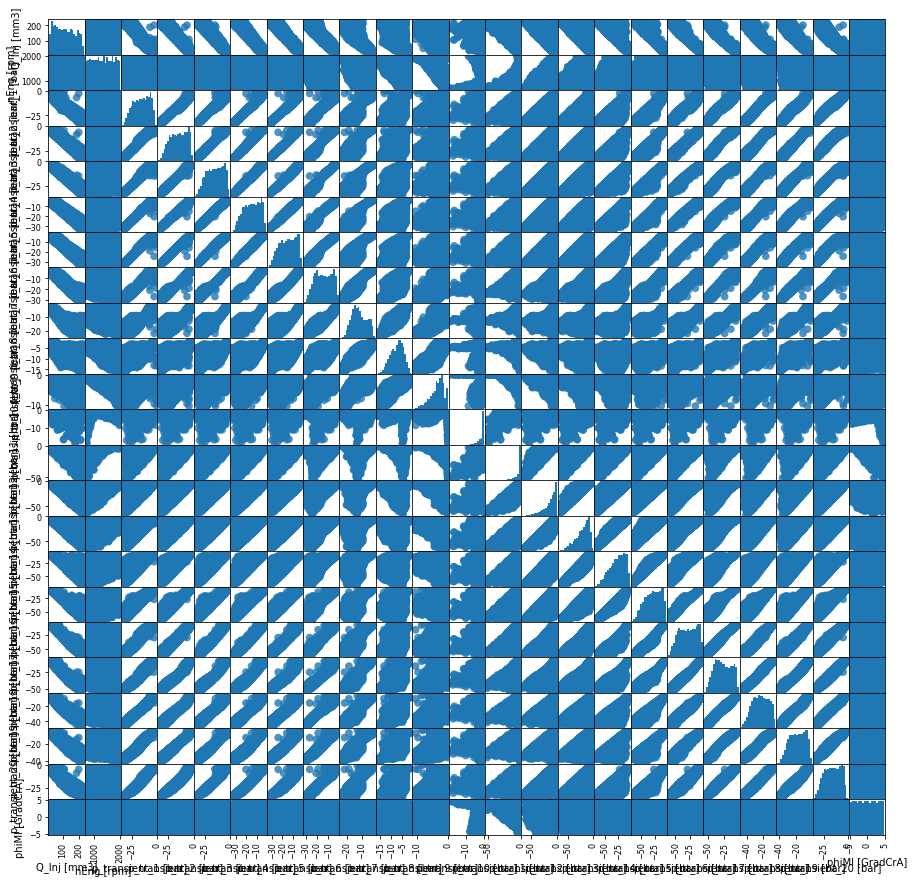

In [11]:
# %% Data analysis
# Analyse names of Data Frame columns
print(dataTrain.columns)
# Analyse values of each column
print(dataTrain.describe())
# Plot for a given number pressure curves
number_of_plots = 2
random_numbers = [randint(0,dataTrain.shape[0]) for p in range(0,number_of_plots)]
print(random_numbers)
for i in random_numbers:
    plt.plot(dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values)
    plt.show()
    print("Q:", dataTrain.loc[i,"Q_Inj [mm3]"])
    print("Max:", dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max(), "Min:", dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.min(),
         "Diff:", dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max() - dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.min())
    print("Max_ber:", dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.max(), "Min_ber:", dataTrain.loc[i,"p_transient_1 [bar]":"p_transient_20 [bar]"].values.min())
# Calculate correlation coefficients for two columns
Coeff = np.corrcoef(dataTrain['Q_Inj [mm3]'], dataTrain['p_transient_5 [bar]'])
print(Coeff)
#Plotting a correlation plot (all in one)
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(dataTrain.corr(), annot=True, cmap="RdYlGn")
plt.show()
# Plot correlation of two columns
plt.plot(dataTrain['Q_Inj [mm3]'], dataTrain['p_transient_5 [bar]'], 'bo')
# Create a scatter matrix from the dataframe (all in one)
grr = scatter_matrix(dataTrain, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

c:\users\ril3si\.conda\envs\p4m\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean absolute error on training set 3.569449021741787



,0-50,50-100,100-150,150-200,>200
count,1918.000000,2523.000000,2342.000000,2142.000000,1066.000000
mean,0.132405,0.051449,0.026137,0.018946,0.020658
std,0.136107,0.043902,0.021127,0.016333,0.018080
min,0.000023,0.000008,0.000034,0.000012,0.000020
25%,0.044742,0.019582,0.010282,0.006670,0.008097
50%,0.096178,0.041533,0.021237,0.015198,0.016331
75%,0.170715,0.072741,0.036613,0.026777,0.028536
max,1.132117,0.642542,0.185951,0.138668,0.160820


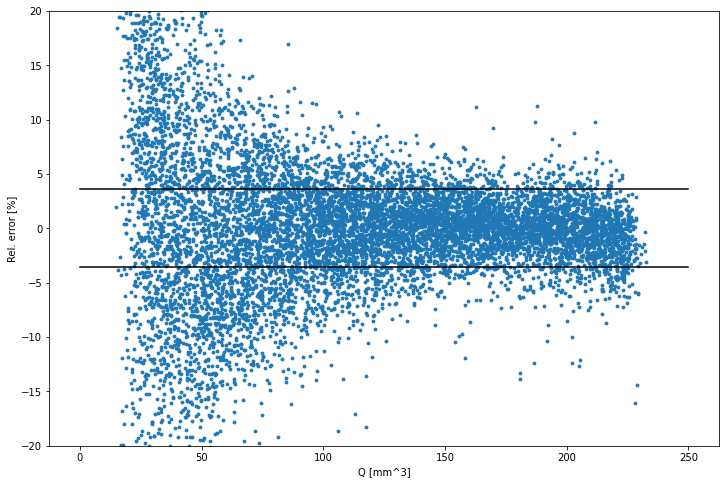

In [12]:
# %% Regression model building
# Define input & output variables used for training
xTrain = dataTrain.loc[:,"nEng [rpm]":"p_transient_20 [bar]"].values
yTrain = dataTrain['Q_Inj [mm3]']
# Scale input variables to range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(xTrain)
xTrain_scaled = pd.DataFrame(scaler.transform(xTrain))
# Set model parameters for Neural Network
alpha = 0.0001
neurons = (3,)
solver_chosen = 'lbfgs'
activation_function = 'logistic'
maximum_iterations = 10000
simple_mlp_reg = MLPRegressor(hidden_layer_sizes=neurons, activation=activation_function, solver = solver_chosen, max_iter=maximum_iterations)
# Calculating & evaluating regression with training data
table_per_quantity = percentage_split_eval(simple_mlp_reg, xTrain_scaled, yTrain, 20)

Mean absolute error on test set 6.420042432061432


,0-50,50-100,100-150,150-200,>200
count,1601.000000,2385.000000,3553.000000,1843.000000,3971.000000
mean,0.271910,0.106172,0.047553,0.055051,0.023066
std,0.399139,0.377374,0.291089,0.317676,0.146205
min,0.000308,0.000007,0.000005,0.000009,0.000012
25%,0.057214,0.025961,0.007254,0.005621,0.005805
50%,0.140086,0.055819,0.016015,0.012451,0.012004
75%,0.381494,0.092605,0.028039,0.023005,0.020142
max,5.286763,4.677255,3.930812,3.155982,2.689689


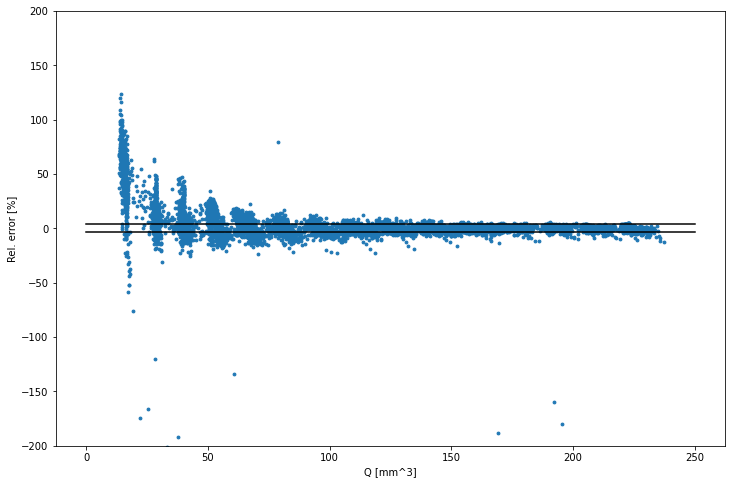

In [13]:
# %% Testing regression model
# Define input & output variables used for testing (must be equal to training variables)
xTest = dataTest.loc[:,"nEng [rpm]":"p_transient_20 [bar]"].values
yTest = dataTest['Q_Inj [mm3]']
# Scale input variables to range from -1 to 1
xTest_scaled = pd.DataFrame(scaler.transform(xTest))
# Evaluating regression with test data
table_per_quantity = percentage_split_test(simple_mlp_reg, xTest_scaled, yTest, 200)

Mean absolute error on test set 9.934008024239652


,0-50,50-100,100-150,150-200,>200
count,41.000000,511.000000,686.000000,1096.000000,3796.000000
mean,1.606621,0.259733,0.168226,0.082480,0.023382
std,1.529537,0.791653,0.648196,0.409652,0.149517
min,0.003838,0.000118,0.000033,0.000009,0.000012
25%,0.173691,0.026532,0.010367,0.005238,0.005726
50%,1.205758,0.053016,0.023308,0.012611,0.011886
75%,3.018658,0.097186,0.042627,0.024592,0.019987
max,5.286763,4.677255,3.930812,3.155982,2.689689


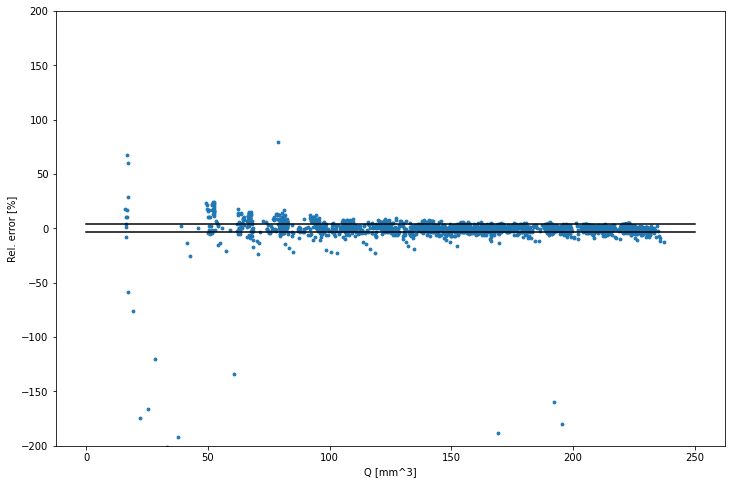

Mean absolute error on test set 3.437331225409813


,0-50,50-100,100-150,150-200,>200
count,1560.000000,1874.000000,2867.000000,747.000000,175.000000
mean,0.236831,0.064299,0.018679,0.014806,0.016198
std,0.235361,0.049279,0.016530,0.011535,0.009380
min,0.000308,0.000007,0.000005,0.000015,0.000320
25%,0.055868,0.025749,0.006884,0.005854,0.009431
50%,0.137412,0.056211,0.014791,0.012334,0.015854
75%,0.370098,0.091635,0.025901,0.021528,0.022794
max,1.234012,0.347026,0.127279,0.092226,0.039660


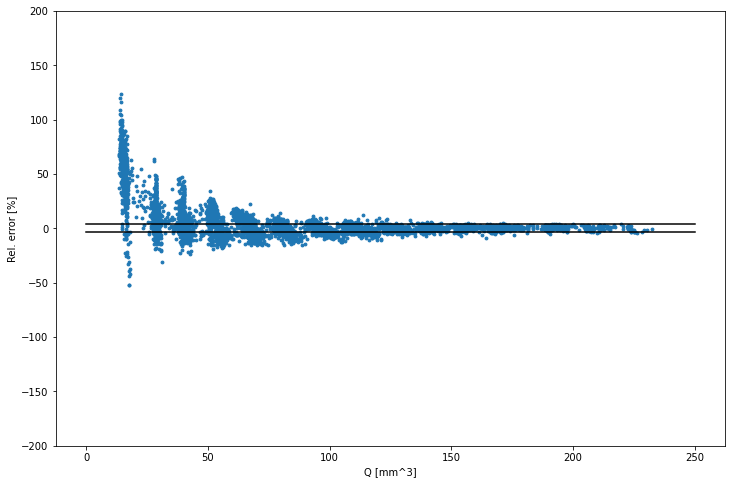

In [14]:
# %% Outlier detection
## Set parameters for nearest neighbors
number_of_neighbors=10
# Fit model on training data
nbrs = NearestNeighbors(n_neighbors=number_of_neighbors, algorithm='ball_tree').fit(xTrain_scaled)
# Calculate distances of test data compared to model
distances, neighbourpoints = nbrs.kneighbors(xTest_scaled)
# Define distance to split data in outlier and non-outlier
allowed_distance = 0.3
# Split test data in outlier and non-outlier
xTest_scaled_out = xTest_scaled[distances[:,9]>allowed_distance]
yTest_out = yTest[distances[:,9]>allowed_distance]
xTest_scaled_no_out = xTest_scaled[distances[:,9]<allowed_distance]
yTest_no_out = yTest[distances[:,9]<allowed_distance]
# Test with outlier and non-outlier
# Outlier
table_per_quantity = percentage_split_test(simple_mlp_reg, xTest_scaled_out, yTest_out, 200)
# Non-Outlier
table_per_quantity = percentage_split_test(simple_mlp_reg, xTest_scaled_no_out, yTest_no_out, 200)